In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [363]:
data=pd.read_csv("Data_Train.csv")

In [364]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [365]:
category = ['Airline','Source','Destination','Additional_Info']
for i in category:
   print(i, data[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [366]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')

In [367]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [368]:
data['Date' ]=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year' ]=data.Date_of_Journey.str[2]

In [369]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [370]:
data.Route=data.Route.str.split('->')
data.Route

0                    [BLR → DEL]
1        [CCU → IXR → BBI → BLR]
2        [DEL → LKO → BOM → COK]
3              [CCU → NAG → BLR]
4              [BLR → NAG → DEL]
                  ...           
10678                [CCU → BLR]
10679                [CCU → BLR]
10680                [BLR → DEL]
10681                [BLR → DEL]
10682    [DEL → GOI → BOM → COK]
Name: Route, Length: 10683, dtype: object

In [371]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [372]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [373]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [374]:
data.Arrival_Time=data.Arrival_Time.str.split('')

In [375]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [376]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [377]:
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [378]:
data.Duration=data.Duration.str.split('')

In [379]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours 
data['Travel_Mins']=data.Duration.str[1]

data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [380]:
data.Total_Stops.replace('non_stop',0,inplace=True) 
data.Total_Stops=data.Total_Stops.str.split('') 
data.Total_Stops=data.Total_Stops.str[0]

In [381]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [382]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                10683
City4                10683
City5                10683
City6                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date             0
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins    10683
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [383]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [384]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1, inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)

In [385]:
data['City3'].fillna('None',inplace=True)

In [386]:
data['Arrival_date'].fillna(data['Arrival_date'],inplace=True)

In [387]:
data['Travel_Mins'].fillna(0,inplace=True)

In [388]:
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64') 
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64') 
data.Arrival_date=data.Arrival_date.astype('int64')
data['Arrival_Time_Hour']=pd.factorize(data.Arrival_Time_Hour)[0].astype('int64')
data['Arrival_Time_Mins']=pd.factorize(data.Arrival_Time_Mins)[0].astype('int64')
data.Travel_Mins=data.Travel_Mins.astype('int64')

In [389]:
data.isnull().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                    0
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date             0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [390]:
data[data['Travel_Hours']=='5m']

Empty DataFrame
Columns: [Airline, Source, Destination, Total_Stops, Additional_Info, Price, Date, Month, Year, City1, City2, City3, Dep_Time_Hour, Dep_Time_Mins, Arrival_date, Arrival_Time_Hour, Arrival_Time_Mins, Travel_Hours, Travel_Mins]
Index: []

In [391]:
data.drop(index=6474,inplace=True,axis=0)

In [392]:
data['Travel_Hours'] = pd.factorize(data.Travel_Hours)[0].astype('int64')

In [393]:
categorical=['Airline', 'Source', 'Destination', 'Additional_Info', 'City1']
numerical=['Total_Stops', 'Date', 'Month', 'Year', 'Dep_Time_Hour', 'Dep_Time_Mins', 'Arrival_date', 'Arrival_Time_Hour',
            'Arrival_Time_Mins', 'Travel Hours', 'Travel_Mins']

In [394]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [395]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source) 
data.Destination=le.fit_transform(data.Destination) 
data.Total_Stops=le.fit_transform(data.Total_Stops) 
data.City1=le.fit_transform(data.City1) 
data.City2=le.fit_transform(data.City2) 
data.city3=le.fit_transform(data.City3) 
data.Additional_Info=le.fit_transform(data.Additional_Info) 
data.head()

Airline  Source  Destination  Total_Stops  Additional_Info  Price  Date  \
0        3       0            5            0                8   3897    24   
1        1       3            0            0                8   7662     1   
2        4       2            1            0                8  13882     9   
3        3       3            0            0                8   6218    12   
4        3       0            5            0                8  13302     1   

   Month  Year  City1  City2 City3  Dep_Time_Hour  Dep_Time_Mins  \
0      3  2019     18      0  None             22             20   
1      5  2019     84      0  None              5             50   
2      6  2019    118      0  None              9             25   
3      5  2019     91      0  None             18              5   
4      3  2019     29      0  None             16             50   

   Arrival_date  Arrival_Time_Hour  Arrival_Time_Mins  Travel_Hours  \
0             0                  0                 -1             0   
1             1                  0                 -1             0   
2             0                  0                 -1             0   
3             2                  0                 -1             0   
4             2                  0                 -1             0   

   Travel_Mins  
0            2  
1            7  
2            1  
3            5  
4            4

In [396]:
data=data[['Airline', 'Source', 'Destination', 'Date', 'Month', 'Year', 'Dep_Time_Hour', 'Dep_Time_Mins', 'Arrival_date', 'Arrival_Time_Hour', 'Arrival_Time_Mins', 'Price']]

In [397]:
data.head()

Airline  Source  Destination  Date  Month  Year  Dep_Time_Hour  \
0        3       0            5    24      3  2019             22   
1        1       3            0     1      5  2019              5   
2        4       2            1     9      6  2019              9   
3        3       3            0    12      5  2019             18   
4        3       0            5     1      3  2019             16   

   Dep_Time_Mins  Arrival_date  Arrival_Time_Hour  Arrival_Time_Mins  Price  
0             20             0                  0                 -1   3897  
1             50             1                  0                 -1   7662  
2             25             0                  0                 -1  13882  
3              5             2                  0                 -1   6218  
4             50             2                  0                 -1  13302

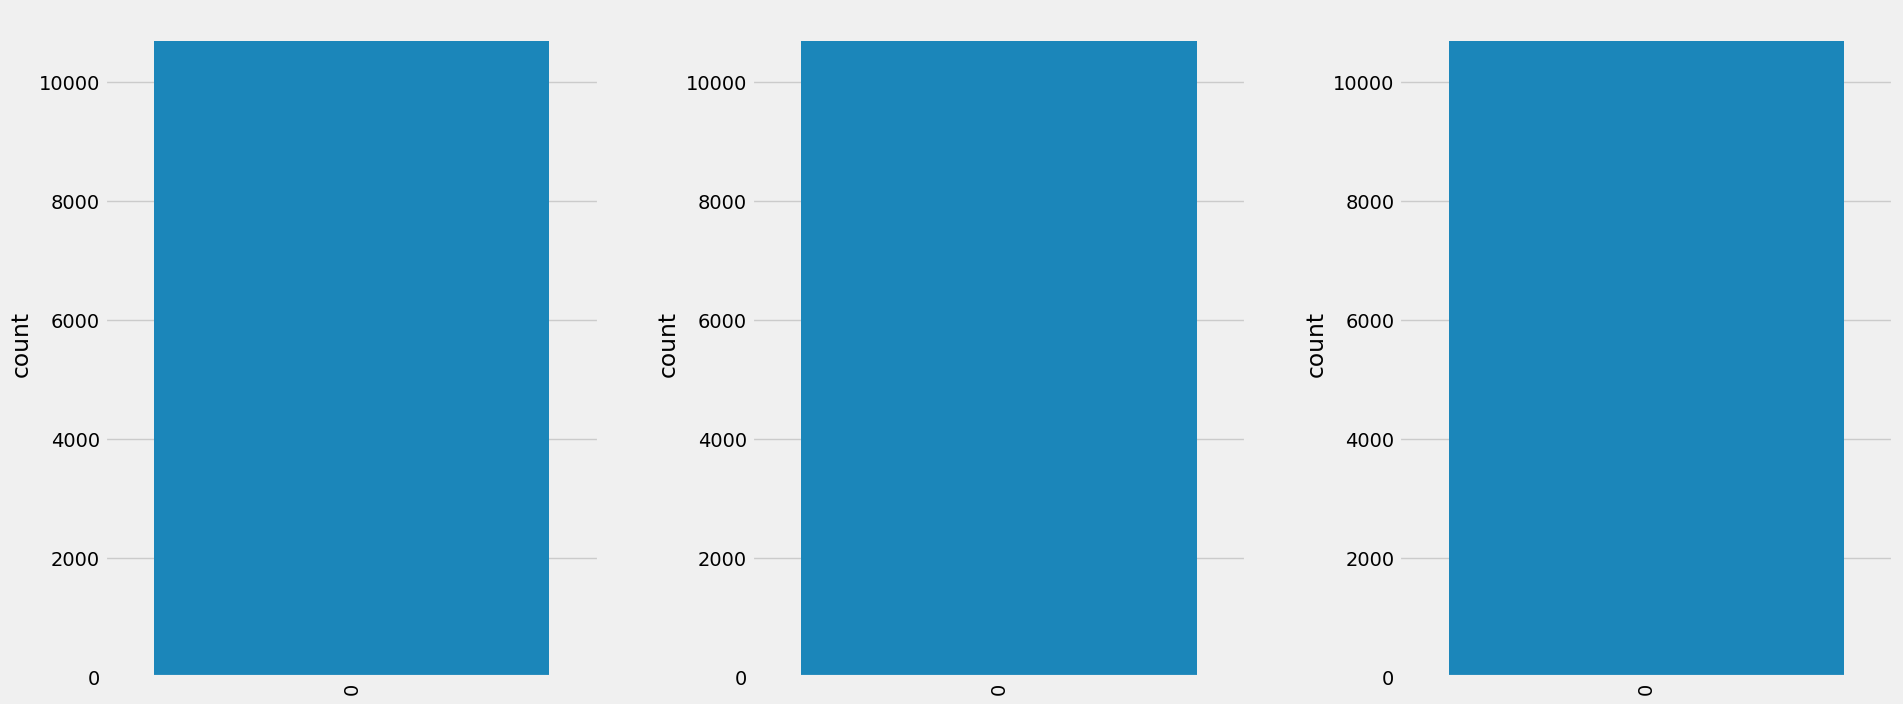

In [398]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))

category = ['Airline','Source','Destination']
for i in category:
    plt.subplot(6,3,c)  
    sns.countplot(data[i])  
    plt.xticks(rotation=90) 
    plt.tight_layout(pad=3.0)
    c=c+1

plt.show()

<Axes: xlabel='Price', ylabel='Density'>

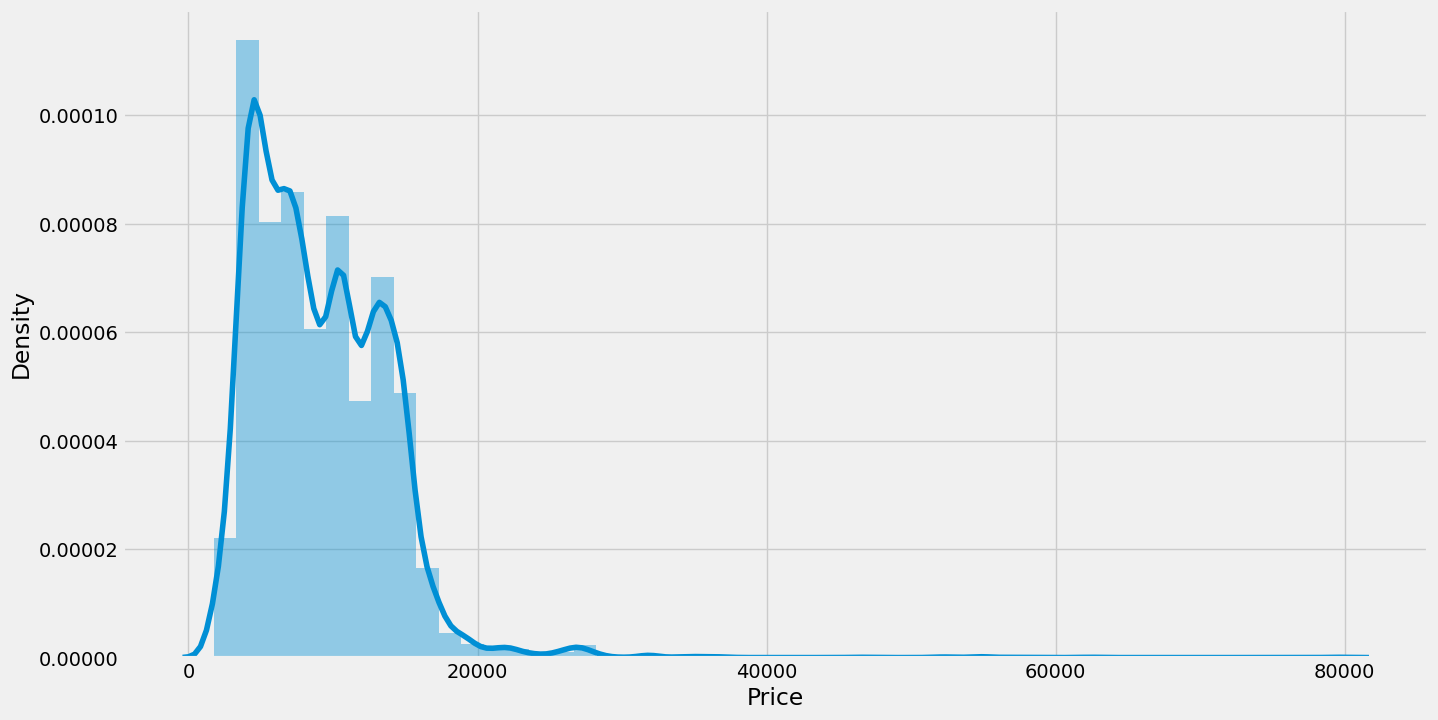

In [399]:
import pandas as pd
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

<Axes: >

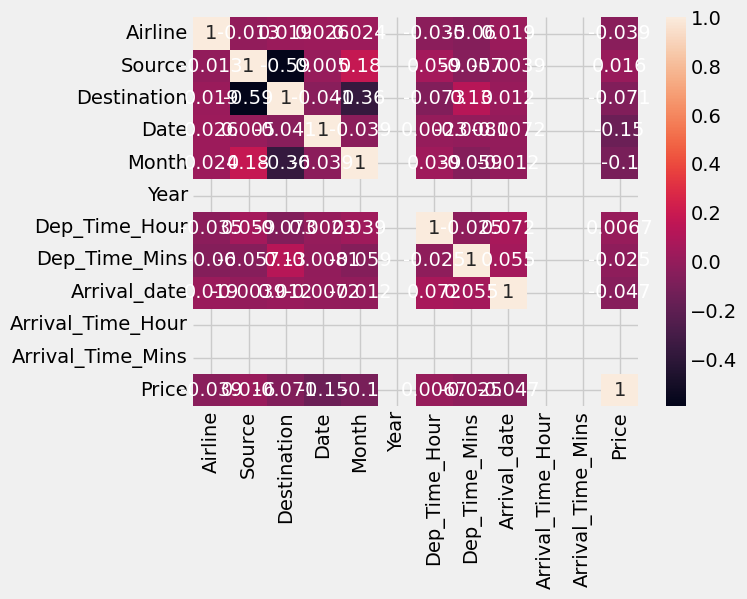

In [400]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

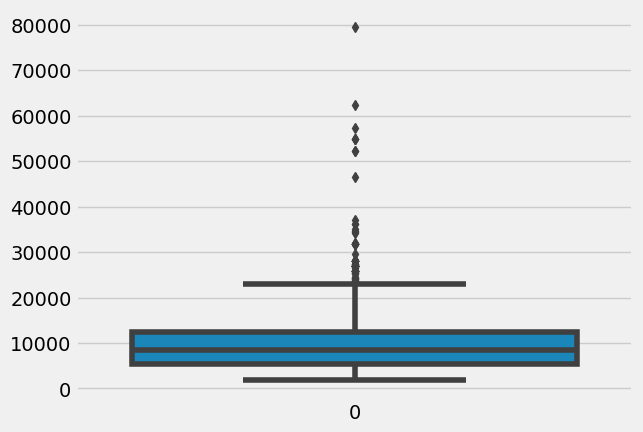

In [401]:
import seaborn as sns
sns.boxplot(data['Price'])

In [402]:
y = data['Price']
x = data.drop(columns=['Price'],axis=1)

In [403]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [404]:
data = {'column_1': [1, 2, 3, 4],
        'column_2': [5, 6, 7, 8],
        'target_column': [0, 1, 0, 1]}
df = pd.DataFrame(data)
ss = StandardScaler()
x = df.drop('target_column', axis=1)
x_scaled = ss.fit_transform(x)

In [405]:
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

column_1  column_2
0 -1.341641 -1.341641
1 -0.447214 -0.447214
2  0.447214  0.447214
3  1.341641  1.341641

In [406]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

data = {'column_1': [1, 2, 3, 4],
        'column_2': [5, 6, 7, 8],
        'target_column': [0, 1, 0, 1]}

df = pd.DataFrame(data)
x = df.drop('target_column', axis=1)
y = df['target_column']

ss = StandardScaler()
x_scaled = ss.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)
score = lr.score(x_test, y_test)
print("R^2 Score:", score)

R^2 Score: nan


In [407]:
print(x_train[:5])

[[ 1.34164079  1.34164079]
 [-1.34164079 -1.34164079]
 [ 0.4472136   0.4472136 ]]


In [408]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
rfr=RandomForestRegressor() 
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [409]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [410]:
for i in [rfr,gb,ad]:
	i.fit(x_train,y_train)
	y_pred=i.predict(x_test) 
	test_score=r2_score(y_test,y_pred)
	train_score=r2_score(y_train, i.predict(x_train)) 
	if abs(train_score-test_score)<=0.2:
		print(i)

		print("R2 score is",r2_score(y_test,y_pred))
		print("R2 for train data",r2_score(y_train, i.predict(x_train))) 
		print("Mean Absolute Error is",mean_absolute_error(y_pred,y_test))
		print("Mean Squared Error is",mean_squared_error(y_pred,y_test)) 
		print("Root Mean Sqaured Error is",(mean_squared_error(y_pred,y_test,squared=False))) 

In [411]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [412]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [413]:
knn=KNeighborsRegressor()
svr=SVR() 
dt=DecisionTreeRegressor()

In [414]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
test_score=r2_score(y_test,y_pred)
train_score=r2_score(y_train,i.predict(x_train)) 
if abs(train_score-test_score)<=0.2:
		print(i)

		print("R2 score is",r2_score(y_test,y_pred))
		print("R2 for train data",r2_score(y_train, i.predict(x_train))) 
		print("Mean Absolute Error is",mean_absolute_error(y_pred,y_test))
		print("Mean Squared Error is",mean_squared_error(y_pred,y_test)) 
		print("Root Mean Sqaured Error is",(mean_squared_error(y_pred,y_test,squared=False))) 

In [415]:
from sklearn.model_selection import cross_val_score 
for i in range(2,5): 
	cv=cross_val_score (rfr,x,y,cv=i)
	print(rfr,cv.mean())

RandomForestRegressor() -0.21320000000000006
RandomForestRegressor() nan
RandomForestRegressor() nan


In [416]:
from sklearn.model_selection import RandomizedSearchCV

In [417]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)
rf_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [418]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV (estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)
gb_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [419]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))

train accuracy 0.6020408163265308
test accuracy nan


In [420]:
knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))

train accuracy -1.9999999999999996
test accuracy nan


In [421]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train)) 
print("test accuracy",r2_score(y_test_pred,y_test))

train accuracy -0.5000000000000002
test accuracy nan


In [422]:
Price=[3897,7662,13882,6218,13302,3873,11087,22270,11087,8625,8907,4174,4667,9663,4804,14011,5830,10262,13381,12898,19495,6955,3943,4823,7757,13292,8238,7682,4668,3687,3687,13227,4423,10919,12373,5894,4649,6245,19225,14924,9646,8714,12373,3383,13062,3527,3943,4667,6117]
price_list=pd.DataFrame({'Price':Price})
price_list

Price
0    3897
1    7662
2   13882
3    6218
4   13302
5    3873
6   11087
7   22270
8   11087
9    8625
10   8907
11   4174
12   4667
13   9663
14   4804
15  14011
16   5830
17  10262
18  13381
19  12898
20  19495
21   6955
22   3943
23   4823
24   7757
25  13292
26   8238
27   7682
28   4668
29   3687
30   3687
31  13227
32   4423
33  10919
34  12373
35   5894
36   4649
37   6245
38  19225
39  14924
40   9646
41   8714
42  12373
43   3383
44  13062
45   3527
46   3943
47   4667
48   6117